In [1]:
from MAG_network import CitationNetwork
import os 
from matplotlib import pyplot as plt
import pandas as pd
import findspark
import MAGspark 

import sys

sys.path.insert(0,"/home/laal/MAG/CentralityFairness/Evaluations")

# from Evaluations.Evaluator import Evaluator


# set environment variables
os.environ["SPARK_LOCAL_DIRS"] = "/home/laal/MAG/TMP"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-1.8.0.242.b08-0.el7_7.x86_64"
os.environ['SPARK_HOME'] = "/home/laal/MAG/spark-3.0.2-bin-hadoop2.7"

In [2]:
mag, spark = MAGspark.get_mag_with_cluster_connection(jobid=41905, memory_per_executor=14000,
                                                      data_folderpath="/home/laal/MAG/DATA/")

['NAME STATE JOBID', 'Multi_input1 RUNNING 41846', 'Multi_input2 RUNNING 41847', 'lil_bobby RUNNING 41907', 'lil_bobby RUNNING 41906', 'sparkcluster RUNNING 41905', 'gridsearch_single_input_multi_channel3 RUNNING 41815', 'gridsearch_multi_multi2 RUNNING 41871', 'gridsearch_multi_multi3 RUNNING 41870', 'jupyter RUNNING 41877', '']


In [5]:
spark.stop()

In [3]:
sociology = CitationNetwork(mag, fos_id=144024400, fos_name="Sociology", root_data_folder="/home/laal/MAG/DATA")

In [4]:
sociology.check_references_and_citations()

Paper references and citations available for Sociology


In [5]:
sociology.save_author_network("SimpleWeightSociology2010", mindate='1800-01-01', maxdate='2010-12-31')
network_df = sociology.load_author_author_network("SimpleWeightSociology2010")

Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightSociology2010.txt. Use overwrite to replace


In [6]:
network_df, nodelist = sociology.nodelist_and_edge_count()

The network has 6233863 edges
The network has 635826 nodes


In [7]:
graph, node_mapping, eweight = sociology.build_graph()
sociology.compute_centralities(graph, node_mapping, eweight, "", pr_damping=0.85)
sociology.append_gender_and_macrank()

Initiating PageRank
Initiating degree measures
Finished centrality computations
Centrality CSV saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightSociology2010Centrality.csv
Gendered centrality measures saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightSociology2010CentralityGendered.csv


In [1]:
spark.stop()

NameError: name 'spark' is not defined

### Rerun networks

In [3]:
id_names = [(185592680, 'Chemistry'), (15744967, 'Psychology'), (33923547, 'Mathematics'), (162324750, 'Economics')]

for fos_id, name in id_names:
    print("Starting network extraction for {}".format(name))
    
    network = CitationNetwork(mag, fos_id=fos_id, fos_name=name, root_data_folder="/home/laal/MAG/DATA")
    network.check_references_and_citations()
    network.save_author_network("SimpleWeight{}2020".format(name), mindate='1800-01-01', maxdate='2020-12-31')
    network.load_author_author_network("SimpleWeight{}2020".format(name))
    network.nodelist_and_edge_count()    
    print("\n----------------------------\n")

Starting network extraction for Chemistry
Paper references and citations available for Chemistry
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020.txt. Use overwrite to replace
The network has 1361642334 edges
The network has 15845298 nodes
Gender distribution: -1    11910223
 1     2580695
 0     1354380
Name: Gender, dtype: int64

----------------------------

Starting network extraction for Psychology
Paper references and citations available for Psychology
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2020.txt. Use overwrite to replace
The network has 419209380 edges
The network has 4088513 nodes
Gender distribution: -1    2464853
 0     814668
 1     808992
Name: Gender, dtype: int64

----------------------------

Starting network extraction for Mathematics
Paper references and citations available for Mathematics
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020.txt. Use overwrite to replace
The network has 9447

In [4]:
id_names = [(15744967, 'Psychology'), (33923547, 'Mathematics'), (162324750, 'Economics')]
id_names = [(185592680, 'Chemistry')]

for fos_id, name in id_names:
    print("Starting network extraction for {}".format(name))
    
    network = CitationNetwork(mag, fos_id=fos_id, fos_name=name, root_data_folder="/home/laal/MAG/DATA")
    network.check_references_and_citations()
    network.save_author_network("SimpleWeight{}2020".format(name), mindate='1800-01-01', maxdate='2020-12-31')
    network.load_author_author_network("SimpleWeight{}2020".format(name))
    
    # graph, node_mapping, eweight = network.build_graph()
    # network.compute_centralities(graph, node_mapping, eweight, "", pr_damping=0.85)
    network.append_gender_and_macrank()
    
    # network.nodelist_and_edge_count()    
    print("\n----------------------------\n")

Starting network extraction for Chemistry
Paper references and citations available for Chemistry
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020.txt. Use overwrite to replace
Gendered centrality measures saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020CentralityGendered.csv

----------------------------



In [6]:
id_names = [(15744967, 'Psychology'), (33923547, 'Mathematics'), (162324750, 'Economics'), (185592680, 'Chemistry')]

for fos_id, name in id_names:
    print("Starting network extraction for {}".format(name))
    
    network = CitationNetwork(mag, fos_id=fos_id, fos_name=name, root_data_folder="/home/laal/MAG/DATA")
    network.check_references_and_citations()
    network.save_author_network("SimpleWeight{}2020".format(name), mindate='1800-01-01', maxdate='2020-12-31')
    network.load_author_author_network("SimpleWeight{}2020".format(name))
    
    # graph, node_mapping, eweight = network.build_graph()
    # network.compute_centralities(graph, node_mapping, eweight, "", pr_damping=0.85)
    # network.append_gender_and_macrank()
    
    path = network.root_folder + "/NETWORKS/{}".format("SimpleWeight{}2020Centrality".format(name) + 'Gendered.csv')
    
    centrality = 'PageRank'
    
    metrics = ['rND', 'rKL', 'rRD', 'equal_ex']
    print('Evaluating', path, 'with sample size', sample, 'and centrality', centrality)
    
    evaluator = Evaluator(path, centrality, sample)
    evaluator.run_evaluations(metrics)
    
    # network.nodelist_and_edge_count()    
    print("\n----------------------------\n")

ModuleNotFoundError: No module named 'numba'

In [3]:
def build_wacn_slices(fos_id, fos_name, root_data_folder, csv_filepath):
    
    network = CitationNetwork(mag, fos_id=fos_id, fos_name=fos_name, root_data_folder=root_data_folder)
    network.check_references_and_citations(overwrite=False)

    print("Extracting ordered references")
    
    papers = network.mag.getDataframe('Papers')
    paper_refs = network.mag.getDataframe(network.paper_references_name)
    
    if not os.path.exists(csv_filepath):
        query = """
            SELECT pr.PaperId, pr.PaperReferenceId,
            p.Date as pubDate, 
            row_number() over (order by p.Date ASC) rownum
            FROM {} pr
            INNER JOIN Papers p ON pr.PaperId = p.PaperId
            WHERE p.Date is not null and p.Date <= '2020-12-31'
        """.format(network.paper_references_name)

        prefs_with_rownum = network.mag.query_sql(query)
        prefs_with_rownum.createOrReplaceTempView('PaperReferencesRownum')

        num_references = prefs_with_rownum.count()

        query = """
            SELECT 
            YEAR(pubDate), COUNT(*) as numReferences
            FROM PaperReferencesRownum 
            GROUP BY Year(pubDate)
            ORDER BY COUNT(*) DESC
        """
        max_year = network.mag.query_sql(query).toPandas()
        max_number = int(max_year.iloc[0].numReferences)

        print("The year {} had the maximum number of references produced: {}"
             .format(int(max_year.iloc[0]['year(pubDate)']), max_number))

        print("\nCreating slices")

        half_maxnum = int(max_number / 2)

        slice_records = []

        slice_idx = 0

        for i in range(1, num_references, half_maxnum):
            start_index = i
            end_index = i + max_number

            if end_index > num_references:
                end_index = num_references

            records = {
                'slice_index': slice_idx,
                'start_index': start_index,
                'end_index': end_index
            }

            slice_records.append(records)
            slice_idx += 1

            if end_index == num_references:
                break

        slices_df = pd.DataFrame.from_records(slice_records)

        all_indexes = list(slices_df.start_index.values) + list(slices_df.end_index.values)
        all_indexes_string = "(" + ",".join([str(x) for x in all_indexes]) + ")"

        query = """
            SELECT * FROM PaperReferencesRownum 
            WHERE rownum IN {}
        """.format(all_indexes_string)

        border_references = network.mag.query_sql(query)
        border_references_df = border_references.toPandas()

        slice_df = pd.merge(slices_df, border_references_df, how='left', left_on="start_index", right_on="rownum")
        slice_df = pd.merge(slice_df, border_references_df, how='left', left_on="end_index", right_on="rownum",
                            suffixes=('_lower', '_upper'))

        slice_df.to_csv(csv_filepath, index=False)
        print("{} slices identified. Saved to {}".format(len(slice_df), csv_filepath))
    
    slice_df = pd.read_csv(csv_filepath)
        
    # loop over rows and create networks
    for record in slice_df.to_dict('records'):

        print("Extracting {} slice index {} / {}".format(fos_name, record['slice_index'], len(slice_df)))

        network_name = "SimpleWeight{}2020Slice{}".format(fos_name, record['slice_index'])
        network.save_author_network(network_name, 
                                    mindate='1800-01-01', 
                                    maxdate='2020-12-31',
                                    min_rownum=record['start_index'],
                                    max_rownum=record['end_index'])

In [4]:
build_wacn_slices(162324750, 'Economics', root_data_folder="/home/laal/MAG/DATA", 
                  csv_filepath="/home/laal/MAG/CentralityFairness/SLICES/Economics2020.csv")

Paper references and citations available for Economics
Extracting ordered references
Extracting Economics slice index 0 / 30
Paper references and citations available for Economics
Network SimpleWeightEconomics2020Slice0 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020Slice0.txt
Extracting Economics slice index 1 / 30
Paper references and citations available for Economics
Network SimpleWeightEconomics2020Slice1 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020Slice1.txt
Extracting Economics slice index 2 / 30
Paper references and citations available for Economics
Network SimpleWeightEconomics2020Slice2 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020Slice2.txt
Extracting Economics slice index 3 / 30
Paper references and citations available for Economics
Network SimpleWeightEconomics2020Slice3 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020Slice3.txt
Extracting Economics slice index 4 / 30
Paper references and citations availabl

In [ ]:
build_wacn_slices(15744967, 'Psychology', root_data_folder="/home/laal/MAG/DATA", 
                  csv_filepath="/home/laal/MAG/CentralityFairness/SLICES/Psychology2020.csv")

Paper references and citations available for Psychology
Extracting ordered references
The year 2020 had the maximum number of references produced: 4614522

Creating slices
28 slices identified. Saved to /home/laal/MAG/CentralityFairness/SLICES/Psychology2020.csv
Extracting Psychology slice index 0 / 28
Paper references and citations available for Psychology
Network SimpleWeightPsychology2020Slice0 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2020Slice0.txt
Extracting Psychology slice index 1 / 28
Paper references and citations available for Psychology
Network SimpleWeightPsychology2020Slice1 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2020Slice1.txt
Extracting Psychology slice index 2 / 28
Paper references and citations available for Psychology
Network SimpleWeightPsychology2020Slice2 saved to /home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2020Slice2.txt
Extracting Psychology slice index 3 / 28
Paper references and citations available for Psychology
N

In [ ]:
id_names = [(15744967, 'Psychology'), (33923547, 'Mathematics'), (162324750, 'Economics'), (185592680, 'Chemistry')]

In [8]:
build_wacn_slices(33923547, 'Mathematics', root_data_folder="/home/laal/MAG/DATA", 
                  csv_filepath="/home/laal/MAG/CentralityFairness/SLICES/Mathematics2020.csv")

Paper references and citations available for Mathematics
Extracting ordered references
Extracting Mathematics slice index 0 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice0.txt. Use overwrite to replace
Extracting Mathematics slice index 1 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice1.txt. Use overwrite to replace
Extracting Mathematics slice index 2 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice2.txt. Use overwrite to replace
Extracting Mathematics slice index 3 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice3.txt. Use overwrite to replace
Extracting Mathematics slice index 4 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice4.txt. Use overwrite to replace
Extracting Mathematics slice index 5 / 33
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightMathematics2020Slice5.txt. Use overwrite to rep

In [4]:
build_wacn_slices(185592680, 'Chemistry', root_data_folder="/home/laal/MAG/DATA", 
                  csv_filepath="/home/laal/MAG/CentralityFairness/SLICES/Chemistry2020.csv")

Paper references and citations available for Chemistry
Extracting ordered references
Extracting Chemistry slice index 0 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice0.txt. Use overwrite to replace
Extracting Chemistry slice index 1 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice1.txt. Use overwrite to replace
Extracting Chemistry slice index 2 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice2.txt. Use overwrite to replace
Extracting Chemistry slice index 3 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice3.txt. Use overwrite to replace
Extracting Chemistry slice index 4 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice4.txt. Use overwrite to replace
Extracting Chemistry slice index 5 / 37
Network exists at /home/laal/MAG/DATA/NETWORKS/SimpleWeightChemistry2020Slice5.txt. Use overwrite to replace
Extracting Chemistry 

In [3]:
def author_metadata_field(mag):

    author_affiliations = mag.getDataframe('PaperAuthorAffiliations')
    authors = mag.getDataframe('WosToMag')
    paper_root_field = mag.getDataframe('PaperRootFieldMag')
    papers = mag.getDataframe('Papers')
    affiliation = mag.getDataframe('Affiliations')

    query = """
    SELECT paa.AuthorId, prf.FieldOfStudyId, 
    CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END as Gender,
    MIN(a.Rank) as MinAffiliationRank,
    COUNT(DISTINCT(paa.PaperId)) as NumPapers,
    MIN(p.Date) as MinPubDate,
    MAX(p.Date) as MaxPubDate, 
    (COUNT(DISTINCT(paa.PaperId)) / (DATEDIFF( MAX(p.Date), MIN(p.Date) ) / 365)) as PubsPerYear
    FROM PaperAuthorAffiliations AS paa 
    INNER JOIN WosToMag AS wtm ON paa.AuthorId = wtm.MAG 
    INNER JOIN PaperRootFieldMag prf ON paa.PaperId = prf.PaperId
    INNER JOIN Papers p ON p.PaperId = paa.PaperId
    INNER JOIN Affiliations AS a ON paa.AffiliationId = a.AffiliationId
    GROUP BY paa.AuthorId, prf.FieldOfStudyId, CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END 
    ORDER BY paa.AuthorId
    """
    author_metadata_df = mag.query_sql(query)
    return author_metadata_df

def author_metadata_global(mag):

    author_affiliations = mag.getDataframe('PaperAuthorAffiliations')
    authors = mag.getDataframe('WosToMag')
    paper_root_field = mag.getDataframe('PaperRootFieldMag')
    papers = mag.getDataframe('Papers')
    affiliation = mag.getDataframe('Affiliations')

    query = """
    SELECT paa.AuthorId,
    CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END as Gender,
    MIN(a.Rank) as MinAffiliationRank,
    COUNT(DISTINCT(paa.PaperId)) as NumPapers,
    MIN(p.Date) as MinPubDate,
    MAX(p.Date) as MaxPubDate, 
    (COUNT(DISTINCT(paa.PaperId)) / (DATEDIFF( MAX(p.Date), MIN(p.Date) ) / 365)) as PubsPerYear
    FROM PaperAuthorAffiliations AS paa 
    INNER JOIN WosToMag AS wtm ON paa.AuthorId = wtm.MAG 
    INNER JOIN Papers p ON p.PaperId = paa.PaperId
    INNER JOIN Affiliations AS a ON paa.AffiliationId = a.AffiliationId
    GROUP BY paa.AuthorId, CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END 
    ORDER BY paa.AuthorId
    """
    author_metadata_df = mag.query_sql(query)
    return author_metadata_df

In [4]:
author_metadata = author_metadata_field(mag)

In [9]:
author_metadata.write.option("sep", "\t").option("encoding", "UTF-8")\
.csv("/home/laal/MAG/DATA/AuthorMetadataField.csv")

In [4]:
author_metadata_cross = author_metadata_global(mag)

In [6]:
author_metadata_cross.write.option("sep", "\t").option("encoding", "UTF-8")\
.csv("/home/laal/MAG/DATA/AuthorMetadataGlobal.csv")

In [38]:
border_references = network.mag.query_sql(query)
border_references_df = border_references.toPandas()

In [42]:
border_references_df.head()

,PaperId,PaperReferenceId,pubDate,rownum
0,2249592763,1994000457,None,1
1,1993370695,2070557914,1988-01-23,574432
2,2073598084,2056566288,1994-02-01,1148863
3,2099822008,2137873244,1998-01-01,1723294
4,2089901068,2034903818,2000-08-01,2297725


In [54]:
slice_df = pd.merge(slices_df, border_references_df, how='left', left_on="start_index", right_on="rownum")
slice_df = pd.merge(slice_df, border_references_df, how='left', left_on="end_index", right_on="rownum",
                    suffixes=('_lower', '_upper'))
slice_df

,slice_index,start_index,end_index,PaperId_lower,PaperReferenceId_lower,pubDate_lower,rownum_lower,PaperId_upper,PaperReferenceId_upper,pubDate_upper,rownum_upper
0,0,1,1148863,2249592763,1994000457,None,1,2073598084,2056566288,1994-02-01,1148863
1,1,574432,1723294,1993370695,2070557914,1988-01-23,574432,2099822008,2137873244,1998-01-01,1723294
2,2,1148863,2297725,2073598084,2056566288,1994-02-01,1148863,2089901068,2034903818,2000-08-01,2297725
3,3,1723294,2872156,2099822008,2137873244,1998-01-01,1723294,2097503557,2052618091,2002-05-01,2872156
4,4,2297725,3446587,2089901068,2034903818,2000-08-01,2297725,1603530799,2010997253,2003-11-14,3446587
5,5,2872156,4021018,2097503557,2052618091,2002-05-01,2872156,1487271016,1544472346,2005-01-01,4021018
6,6,3446587,4595449,1603530799,2010997253,2003-11-14,3446587,2150065779,1486206345,2006-01-01,4595449
7,7,4021018,5169880,1487271016,1544472346,2005-01-01,4021018,204190154,2978664979,2007-01-01,5169880
8,8,4595449,5744311,2150065779,1486206345,2006-01-01,4595449,72680553,2093759895,2008-01-01,5744311
9,9,5169880,6318742,204190154,2978664979,2007-01-01,5169880,2026785174,2025195871,2008-09-12,6318742


In [4]:
spark.stop()

ERROR! Session/line number was not unique in database. History logging moved to new session 125


In [27]:
prefs_with_rownum.count()

10000

In [25]:
print("The year {} had maximum number of references produced: {}"
     .format(int(max_year.iloc[0]['year(pubDate)']), int(max_year.iloc[0].numReferences)))

The year 2014 had maximum number of references produced: 1148862


# Inter-event analysis

In [18]:
from scipy.stats import ks_2samp

In [112]:
def inter_event_paa(mag): 
    
    paa = mag.getDataframe('PaperAuthorAffiliations')
    prf_mag = mag.getDataframe('PaperRootFieldMag')
    papers = mag.getDataframe('Papers')
    
    query = """
        SELECT paa.PaperId, paa.AuthorId, prfm.FieldOfStudyId, p.Date, 
        ROW_NUMBER() OVER (PARTITION BY paa.AuthorId, prfm.FieldOfStudyId ORDER BY p.Date ASC) AS pubNum
        FROM PaperAuthorAffiliations paa 
        INNER JOIN PaperRootFieldMag prfm ON paa.PaperId = prfm.PaperId
        INNER JOIN Papers p ON paa.PaperId = p.PaperId
        WHERE p.Date is not null AND (p.FamilyId is null OR p.PaperId = p.FamilyId)
    """
    
    pubnums = mag.query_sql(query)
    pubnums.createOrReplaceTempView("AuthorPublicationNumber")
    
    query = """
        SELECT 
        apn1.PaperId as PrevPaperId, 
        apn2.PaperId as CurrentPaperId, 
        apn1.AuthorId, 
        apn1.FieldOfStudyId, 
        apn1.Date as PreviousDate, 
        apn2.Date as CurrentDate,
        DATEDIFF(apn2.Date, apn1.Date) as numDays
        FROM AuthorPublicationNumber apn1 
        INNER JOIN AuthorPublicationNumber apn2 ON 
            apn1.AuthorId = apn2.AuthorId AND
            apn1.FieldOfStudyId = apn2.FieldOfStudyId AND
            apn1.pubNum = (apn2.pubNum - 1)    
    """
    
    inter_events = mag.query_sql(query)
    
    return inter_events

In [113]:
inter_events_df = inter_event_paa(mag)

KeyboardInterrupt: 

In [ ]:
inter_events_df.write.option("sep", "\t").option("encoding", "UTF-8")\
.csv("/home/laal/MAG/DATA/InterEventPublications.csv")

In [114]:
def compute_ks_test(mag, centrality_df, fos_id, base_filepath="/home/laal/MAG/DATA"):
    
    centrality_df[['AuthorId', 'Gender']].to_csv(base_filepath + "/CentralityAuthors.txt", header=False,index=False, sep="\t")
    
    mag.streams['CentralityAuthors'] = ('CentralityAuthors.txt', ['AuthorId:long', 'Gender:int'])
    
    inter_event = mag.getDataframe('InterEventPublications')
    cent_authors = mag.getDataframe('CentralityAuthors')
    
    query = """
        SELECT iep.AuthorId, ca.Gender, iep.DateDiff 
        FROM InterEventPublications  iep
        INNER JOIN CentralityAuthors ca ON iep.AuthorId = ca.AuthorId
        WHERE FieldOfStudyId = {} AND PrevPaperId != CurrentPaperId
    """.format(fos_id)
    
    
    datediffs = mag.query_sql(query).toPandas()
    
    women_interevent = datediffs.query("Gender == 0")['DateDiff']
    men_interevent = datediffs.query("Gender == 1")['DateDiff']
    
    return datediffs

In [94]:
centr_df = pd.read_csv('/home/laal/MAG/CentralityFairness/MATCHING_OUTPUTS/Economics_seed28_matched.csv', 
                      sep="\t").query("Gender != -1")

In [115]:
datediffs = compute_ks_test(mag, centr_df, 162324750)

In [96]:
women_interevent = datediffs.query("Gender == 0")['DateDiff']
men_interevent = datediffs.query("Gender == 1")['DateDiff']

In [97]:
ks_2samp(women_interevent.values, men_interevent.values)

KstestResult(statistic=0.027240065617399334, pvalue=5.206158132358516e-308)

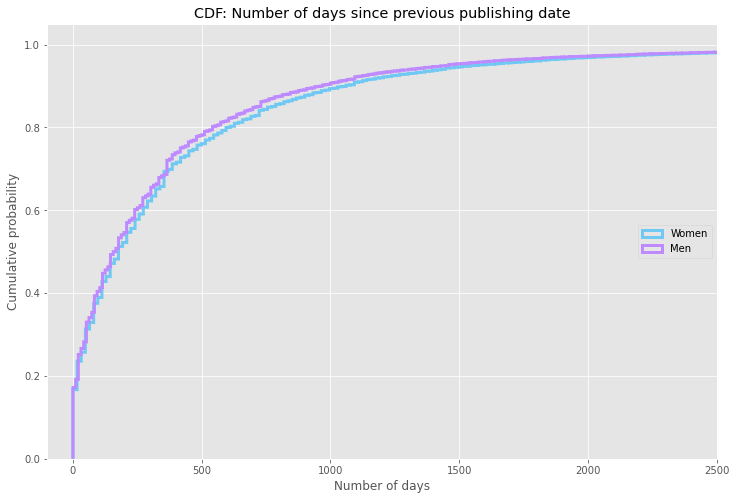

In [118]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

women_interevent.hist(cumulative=True, density=1, bins=2000, histtype='step', figsize=(12,8), 
                      linewidth=3, color="#6fc9f2", label="Women")

men_interevent.hist(cumulative=True, density=1, bins=2000, histtype='step', linewidth=3, 
                    label="Men", color="#bd8aff")

plt.xlim(-100, 2500)
plt.ylim(0.0, 1.05)

plt.title("CDF: Number of days since previous publishing date")
plt.xlabel('Number of days')
plt.ylabel('Cumulative probability')
plt.legend(loc="right")
plt.show()

In [103]:
datediffs[datediffs.AuthorId==9459641].DateDiff.value_counts()

0       162
28       27
31       27
74       27
90       27
92       27
178      27
1249     27
275      27
278      27
306      27
396      27
700      27
1734     27
744      27
760      27
Name: DateDiff, dtype: int64

In [116]:
def author_metadata_field(mag):

    author_affiliations = mag.getDataframe('PaperAuthorAffiliations')
    authors = mag.getDataframe('WosToMag')
    paper_root_field = mag.getDataframe('PaperRootFieldMag')
    papers = mag.getDataframe('Papers')
    affiliation = mag.getDataframe('Affiliations')

    query = """
    SELECT paa.AuthorId, prf.FieldOfStudyId, 
    CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END as Gender,
    MIN(a.Rank) as MinAffiliationRank,
    COUNT(DISTINCT(COALESCE(p.FamilyId, p.PaperId))) as NumPapers,
    MIN(p.Date) as MinPubDate,
    MAX(p.Date) as MaxPubDate, 
    (COUNT(DISTINCT(paa.PaperId)) / (DATEDIFF( MAX(p.Date), MIN(p.Date) ) / 365)) as PubsPerYear
    FROM PaperAuthorAffiliations AS paa 
    INNER JOIN WosToMag AS wtm ON paa.AuthorId = wtm.MAG 
    INNER JOIN PaperRootFieldMag prf ON paa.PaperId = prf.PaperId
    INNER JOIN Papers p ON p.PaperId = paa.PaperId
    INNER JOIN Affiliations AS a ON paa.AffiliationId = a.AffiliationId
    GROUP BY paa.AuthorId, prf.FieldOfStudyId, CASE WHEN wtm.Gender IN (0, 1) THEN wtm.Gender ELSE -1 END 
    ORDER BY paa.AuthorId
    """
    author_metadata_df = mag.query_sql(query)
    return author_metadata_df

In [117]:
# AUTHOR METADATA
author_metadata = author_metadata_field(mag)
author_metadata.write.option("sep", "\t").option("encoding", "UTF-8")\
.csv("/home/laal/MAG/DATA/AuthorMetadataField.csv")